## Load records

In [1]:
import pandas as pd
data = pd.read_csv('../Stakeholders/Stakeholders-clean.csv')

## Preprocess

In [37]:
%run preprocessing.ipynb

[nltk_data] Downloading package stopwords to /Users/ajda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ajda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
ignore_words = [
    "finding", "research", "purpose", "study", "methodology", "result", 
    "analysis", "method", "paper", "literature", "tourism", "also", "within", 
    "whereas", "would", "fig", "may", "however", "could", "might"
]

In [4]:
keyword = "tourist"

In [5]:
original_tokens, verb_tokens, data_preprocessed = preprocess(data,
                                                             to_ignore=ignore_words,
                                                             keyword=keyword,
                                                             save_to_file='stakeholders_preprocessed_pattern2.csv')
print('Documents kept after preprocessing: {}'.format(len(verb_tokens)))

Documents kept after preprocessing: 405


## Basic statistics

### Frequent bigrams

In [6]:
bigram_measures = BigramAssocMeasures()
flat_tokens = [t for doc in original_tokens for t in doc]
finder = BigramCollocationFinder.from_words(flat_tokens)
finder.apply_freq_filter(5)
for (i, j), score in finder.score_ngrams(bigram_measures.pmi):
    if score > 5:
        print(i, j, ': ', score)

interlocking directorships :  13.88075056382738
copper canyon :  13.617716157993584
ayia napa :  13.03275365727243
status quo :  12.939644252880946
shed light :  12.769719251438634
coral reefs :  12.743247040077442
mere exposure :  12.717251831544498
scuba diving :  12.103142985163828
carrying capacity :  11.810361235935979
napa 2008 :  11.769719251438634
long term :  11.48021263424365
sun sea :  11.132289330823344
wide range :  10.700178318185559
environmentally responsible :  10.502238940573651
per year :  10.437143912351763
even though :  10.307860895406797
competitive advantage :  10.245899187313864
national park :  9.988359537913972
findings suggest :  9.917276439852493
conceptual model :  9.871761780600124
climate change :  9.841222199640741
decision making :  9.831119796102778
behavioral intentions :  9.76235586302515
data collection :  9.710825562385066
new zealand :  9.617716157993582
rather than :  9.600536568016759
i think :  9.599794249996323
attitudes towards :  9.59467591

### Word Frequencies

Find most frequent words in the corpus.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
fdist = word_frequencies(verb_tokens)

Change `show_top_n` to adjust the number of words to display.

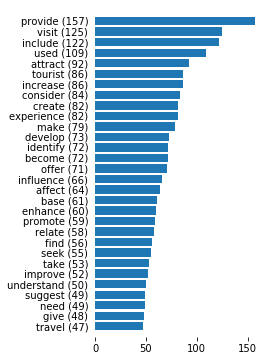

In [8]:
show_top_n = 30

# calc
mc = fdist.most_common(show_top_n)

# plot
mc = mc[::-1] ; ws, fs = zip(*mc) ; ws = ['{} ({})'.format(w, f) for w, f in mc]
plt.figure(figsize=(3, 6*show_top_n/30))
plt.box(False); plt.tick_params(top=False, bottom=True, left=False, right=False, labelleft=True, labelbottom=True)
plt.barh(range(len(ws)), fs) ; plt.yticks(range(len(ws)), ws); plt.ylim(-1, len(ws));
plt.savefig('freq-dist-stakeholders')

In [17]:
for word, freq in mc:
    doc_freq = sum(word in doc for doc in verb_tokens)
    print("{} appears {} times over {} documents".format(word, freq, doc_freq))
    print("    Average document frequency:", round(freq/doc_freq, 3))

travel appears 47 times over 32 documents
    Average document frequency: 1.469
give appears 48 times over 34 documents
    Average document frequency: 1.412
need appears 49 times over 33 documents
    Average document frequency: 1.485
suggest appears 49 times over 34 documents
    Average document frequency: 1.441
understand appears 50 times over 35 documents
    Average document frequency: 1.429
improve appears 52 times over 38 documents
    Average document frequency: 1.368
take appears 53 times over 38 documents
    Average document frequency: 1.395
seek appears 55 times over 25 documents
    Average document frequency: 2.2
find appears 56 times over 41 documents
    Average document frequency: 1.366
relate appears 58 times over 42 documents
    Average document frequency: 1.381
promote appears 59 times over 42 documents
    Average document frequency: 1.405
enhance appears 60 times over 36 documents
    Average document frequency: 1.667
base appears 61 times over 43 documents
    

### Context of words

Find common contexts (co-occurring words) where the words from the list appear.

In [22]:
word_list = ['travel', 'tourist']

context = word_contexts(original_tokens, word_list, num=30)

the_experience their_experience their_experiences a_product
overall_experience a_destination the_industry a_and of_experience
of_behavior of_services the_experiences how_experiences


### Concordances

Find words in text and see in which contexts they appear.

In [38]:
word = "travel"

concordance(data_preprocessed, word)

---- End of document ----
The paucity of research related to domestic medical tourism may be attributed to the widely accepted notion that medical tourists are primarily travelling across international borders .
However, a broad definition of medical tourism reflects the primary purpose of travel for elective surgery .
While it is acknowledged that there are varying definitions of medical tourism, this research subscribes to a broader interpretation of a medical tourist as someone who travels to a destination  outside their usual environment to undertake elective surgical treatment .
Some studies have alluded to significant cost savings when medical tourists travel to less developing countries for medical tourism .
For instance, insurance provider NIB launched a travel option for its clients to purchase to mitigate the risks of medical tourism .
My understanding is that it refers to people who travel overseas for various medical procedures.”    “It means that people travel overseas for

---- End of document ----
This framework is useful in identifying and structuring some of the more important drivers of change that will influence tomorrow's tourism and travel trends.
These drivers also influence the external environment in which consumers make travel related decisions, such as where to go, how to go, what to do and how much to spend.
Efforts to remove barriers to international travel by means of the ongoing liberalisation of transport and other forms of deregulation are expected to continue.
Islam is expected to continue as a focus of global attention and the Middle East situation will have capacity to substantially increase the fuel costs of travel.
Such experiences would have particular appeal to tourists who are highly educated, mature, affluent, well-travelled, environmentally aware and sensitive to the social and cultural traditions, systems and mores of the destinations they visit .
3.4 Technological drivers Technological developments create opportunities as we

This is especially true in developing countries where innovation is necessary to create a more globally competitive tourism product while reducing travel expenditure leakage .
Poor food, poor service, and the idea that visitors think Cuba is expensive contribute to one of the lowest return rates in the travel business .
In 1992, President George Bush strengthened the embargo by restricting travel to Cuba from the US by Cuban-Americans through imposing a limit of $500 per family per year allowed to be spent on travel expenses to Cuba.
Quality transportation is especially important in tourism as travel is by definition part of tourism .
---- End of document ----
Since tourism cannot be simply regarded as a combination of wisdom  and travel , we propose “smart tourism” instead of “wisdom tourism”.
For example, the process of automatically generating a travel route according to the users' inputs and the computational optimization algorithm can be understood as intelligence; whereas the use

---- End of document ----
Although classified as a developing country, Fiji is one of the most economically developed countries in the South Pacific, and also one of the most attractive for tourists and travellers [62].
The total contribution includes:  the direct contribution;  the indirect contributions such as investment spending, government collective spending and the impact of supplier purchases from the travel and tourism sector; and  induced contribution related to the spending of direct and indirect employees.
At an individual level, the number of planned future trips to Fiji can be modelled as follows:       v   i   =  f        where v  i  is the reduction in the number of planned trips by individual i  at perceived impact of dsm  i ,  x   i  is a vector of individual i's characteristics, information on past visits to Fiji, experience and motivation for the recent visit, and travel cost.
Information was also obtained on length of stay, reasons for visiting, travel expenses and

note that a typical tourism value chain consists of four components, the tourism supplier, tour operator, travel agent and customer, which are in a single linked chain.
Third, tourists need to travel to the destinations where tourism products are produced to consume these products.
An example is a travel agency's relationship with its suppliers.
Existing studies of supply management in the tourism industry fall into three broad categories  investigation of the relationships between suppliers  and travel agencies/tour operators,  examination of the relationships between wholesale and retail travel agencies, and  identification of supplier selection problems.
March  finds that Australian travel suppliers are extremely dependent upon travel buyers.
García-Falcón and Medina-Muñoz  examine the diversity in and major characteristics of the relationships between hotels and travel agencies in the United States through an empirical survey.
The results show that having good relationships with tr

Political disturbances or natural disasters can negatively alter the attractiveness of destinations  while positive reviews by travel media can put destinations on the mental maps of potential visitors .
---- End of document ----
Accordingly, patients seeking medical care are willing to travel from developed countries such as Australia, United Kingdom and USA to developing countries such as Costa Rica, India and Thailand for medical treatment .
Statistics on people traveling to other countries to receive medical services are unreliable and as figures presented by different studies they vary from country to country .
However, the number of patients traveling to other countries is increasing annually and this increase is expected to rise even more sharply in years to come .
Hence, it has made an increasing number of people travel from developed countries to developing countries for health care.
---- End of document ----
---- End of document ----
---- End of document ----
ICT also enhance

4.2.1 Tourism in YRD: evolution of the industry, tourism capabilities and strategic goals With some 53 million visitors a year, China is currently the fourth tourism destination in the world ; tourism revenues have increased more than threefold over the period from 1996 to 2006, going from 10 billion RMB to 33.5 billion and the growth potential is still considerable, especially when taking into account the fact that the average family income in China is increasing significantly and more and more Chinese people will be able to travel across the country .
For example, tourism agencies have been involved in the World Expo planning since its early stages: already in 2008, the Shanghai municipality delegated to a series of travel agents the preparation of tourism itineraries for international visitors to the World Expo who wished to visit China.
This meant, of course, that there was a continuous dialogue between the Government, the authorised travel agencies and the hotel owners’ associatio

In the same vein, we maintain that how nearby tourism destinations strike a balance between cooperation and competition both in destination product development and marketing determines their long-term competitiveness in the wider globalized fast-paced travel and tourism industry .
---- End of document ----
reported that the road along which the system was placed was travelled primarily by non-local motorists; it remains to be seen if local drivers may adapt to the RADS and begin to ignore the system.
In an attempt to mitigate this, a RADS was installed in 2012 on the most traveled road in BCNP as an experimental alternative to a wildlife crossing structure and fencing, which were opposed by key stakeholder groups because of potential restriction of access.
Vehicles traveling east and west were both included.
We made two separate speed measurements for each vehicle: vehicle speed outside of the RADS sensor array  and speed of the same vehicles after traveling halfway through the RADS ar

---- End of document ----
For example, for tourists thinking about their next winter holiday or vacation destinations and government agencies worried about seasonal occupancy rates, climate change may seem trivial compared to other clear and present concerns affecting tourism development such as landscape degradation by coastal erosion, natural resources scarcity, shifting travel patterns, destination attractiveness or volatile economic conditions.
4.1 Climate and the tourism industry From a traveller’s point of view, climate has a broad significance to his decision-making and his vacation experience.
---- End of document ----
A significant number of respondents work in the dive tourism industry  including dive operating businesses, tourist accommodation, restaurants, travel agents, internet cafés, supermarkets, retail shops, photo studios, laundry services, massage, and transportation.
Their main purpose of traveling is to be in the waters and able to walk on the reefs and take pictur

---- End of document ----
---- End of document ----
These stakeholders include DMOs, tourism associations, accommodation and catering facilities, sport and recreational facilities, cultural facilities, transport associations, municipalities and travel agencies.
---- End of document ----
Indeed, some tourists travel almost exclusively for some of these experiences, for example food tourism .
---- End of document ----
Despite a recent increase in the number of research papers on this topic, most of the literature remains focused on evaluating the economic efficiency or performance of hotels , travel agencies , scenic spots , destinations , the tourism industry  and trade shows  from the perspectives of economics, marketing and management.
reviewed several regional and national scenarios of carbon efficiency and concluded that distance travelled and mode of transport are the two critical factors influencing low eco-efficiency.
---- End of document ----
---- End of document ----
We use as 

---- End of document ----
In consequence, sites such as TripAdvisor.com, Qiongyou.com  become popular since they are great platforms for reviews, pictures, and blogs of experienced tourists and residents' traveling and living experiences in different tourism destinations .
Primarily, potential travellers engage in online travel communities and travel themed social media platforms for information from experienced travellers, which may largely influence the travel decision making .
In fact, residents of a tourism destination and travellers can interact with each other in online communities, and “the interaction occurs before the traveller arrives at the destination and may influence where travellers visit and their choice of accommodation and restaurants” .
For instance, Bieger and Laesser  suggest that residents are important source of information for travellers via internet.
emphasise the direct influences residents have on travel decisions, in a study of Thorn Tree Forum, a part of Lo

In addition, forecasting and estimation of volatility in international tourist arrivals assists the New Zealand government, airline management, airport managers, Tourism New Zealand, tourism operators and destination managers to design and implement effective policies and/or approaches to cater to the needs of international visitors travelling to New Zealand.
For the rest of the countries, we included the previous months' GDP growth level  with the motivation that increased GDP might create more opportunity to spend on travelling in the upcoming period.
Indeed, the GDP growth in a domestic economy would enhance the international trade relationships so do the volume of airfreight and business travels increase.
Accordingly, business travels from South Korea to the rest of the world  has increased as well.
However, Australia's insignificant positive coefficient of the growth in ‘GDP per capita’  may stem from other factors beyond the macroeconomic determinants affecting Australia's monthl

Youth travel, in southern European resorts in particular, frequently involves excessive drinking and resultant adverse outcomes, such as blackouts, falls/injuries, accidents, vandalism, fights, sexual risk-taking or assault, and even death .
Mirroring a number of coastal European locales in the Mediterranean where this particular type of travel activity is increasing, the Cypriot resort town of Ayia Napa has not only developed into a “clubbing” capital but has also started to experience a series of health ramifications for travelers and locals alike.
Clubbing destinations are purposefully packaged and aggressively marketed by transnational tour operators [TO] to that segment of youth travelers seeking hedonistic playgrounds that offer unrestrained drinking and round-the-clock partying with others of their own age, a host of activities that permit behaviors unconstrained by social norms at home, and music and dancing to offer a release from customs of the civilized social spaces of dail

To address the aforementioned research gaps, domestic tourists’ motivation and travel intentions are explored in the context of Sichuan, China in the aftermath of the Wenchuan earthquake .
Since the debate over the term “dark tourism” is beyond the scope of this study, following the majority of the literature in the field, its definition as “the act of travel to sites associated with death, suffering or the seemingly macabre”  is adopted here.
This can be achieved not only by investigating tourists’ varied motivations, but also by examining the travel intentions of potential visitors.
Post-disaster destinations, motivations and intentions Motivation is critical for understanding why people travel and engage in a particular activity .
While various approaches have been adopted to classify travel motivations, it is generally agreed that push and pull factors are central for understanding the tourist decision-making process .
Push factors refer to internal, socio-psychological drivers tha

In this case, firms partially outsource their marketing and commercial activities to the DMO, which supports them in the processes of selling and promoting tourism services to sightseers, tour operators and travel agencies.
---- End of document ----
The tourism sector in these sites is mainly domestic and most visitants travel from nearby cities to spend weekends and holidays in a second-home or in a rented house.
In the remaining sites between 36 and 46% of the visitors travelled from other regions of Chile.
---- End of document ----
The report estimated that 27,764 attendees were Extra Visitors who would not have traveled to Victoria if it was not for the Australian Grand Prix.
Of these 3,800 visitors, 2,668 traveled from outside of Victoria.
---- End of document ----
---- End of document ----
---- End of document ----
Similarly, Yuzhanin and Fisher's  meta-analysis of 15 tourism studies that use TPB to predict intentions to choose a tourist destination found that the majority of the

---- End of document ----
---- End of document ----
The specific modes in Nankun include “caring about residents' production experiences,” “major decision making by CMC is open to residents,” and “caring about residents' living conditions and improving the construction of traveling infrastructure.” The residents' response demonstrates that the community has its own sets of interaction modes , which are key indicators of community participation.
---- End of document ----
---- End of document ----
Indeed, the wide portfolio of online information resources may act as both a facilitator and a barrier within a traveller's vacation decision-making process.
In effect, the online information-seeking process of travellers is rather complex; travellers are motivated to select and use multiple online information sources based on inherent travel-related information needs that relate to the vacation planning decision-making [14].
Especially for practitioners in the tourism industry, there is a grow

---- End of document ----
---- End of document ----
---- End of document ----
Most tourists visiting Chilika are domestic visitors, who come to watch dolphins , but may also visit for other reasons such as to see the lagoon , to travel around  etc.
Tourists travel to Chilika from neighbouring cities by road, usually using hired transport.
As the price of the dolphin-watching ride was usually charged per family or group travelling in a boat, only one person per boat was interviewed, to ensure that the interviewees were independent.
The price of the dolphin-watching ride was charged per family or group travelling in the boat.
---- End of document ----
---- End of document ----
examined the expenditure of attendees in annual events in Miami and confirmed the effects of attendance frequency and travel distance on shifts in expenditure patterns.
The questionnaire included questions regarding the frequency of experiencing agritourism, date and region of recent experience, and reasons of trav

The growing interest in culinary products and traditions implies that food is also becoming a more important factor in trying to influence tourists' motivations for travelling to a particular destination.
The different reactions to unfamiliar meals have been dichotomised by the concepts of neophilia  and neophobia  , depending upon factors like experience, personality, and especially motivation for travel .
The range of driving forces motivating the individual in food tourism may resemble those of adventure tourism in general, including novelty-seeking, enjoyment of moderate fear, thrill and playfulness , and travel involves food neophilia as an important motivator .
Often the members of these “Smalahovelag” travel to Voss to enjoy their annual sheep's-head meal at Løne's restaurant or Fleischer's Hotel, thus crossing the border into the area of the commercial sheep's-head meals.
The first “Smalahovelag” in a commercial setting was initiated by travelling salesmen in the 1960s at Fleis

London and New York are exceptions in that they have very high average travel distances and these form part of an extensive route network.
For these larger airports, the detour factor is relatively smaller, because a large choice of connections is available to offer itineraries that approximate direct travel distance.
Cuzco in Peru, for example, served close to 120,000 departing passengers in January 2017, of which 9.9% travelled on short itineraries.
For Auckland, the risk stems largely from its long-haul network, resulting in high per trip emissions and travel distance.
The share of passengers travelling under 400 km is highest amongst the four case airports and also above global average.
Studies such as these tend to exclude carbon risk stemming from international air travel, mainly because of the current jurisdictions and accounting frameworks that put these outside the consideration of nations  or businesses .
This research, therefore, is the first to examine the exposure of desti

---- End of document ----
Many MPAs that are frequented by scuba divers, wildlife enthusiasts, travelers, and recreational anglers generate considerable income through user fees .
However, focusing solely on diver willingness to pay ignores the large and important population of users who are non-divers but frequent coastal travel destinations and cause considerable impacts.
Additionally, basic sociodemographic and travel information was collected.
Given the wide range of nationalities traveling to Gili Trawangan, collecting information on monthly or annual income was avoided due to confusion in recording the data based on different currencies that may have been reported.
Rather, we use the hotel price and type as a proxy for traveling style and income.
This amount would be automatically added to the cost of the trip unless the traveler specifically opts out of paying the eco-fee.
---- End of document ----
Existing regional-level models have mainly been focusing on the influence of trav

As can be observed from the following quotation, the implementation of these plans has stalled largely due to administrative and bureaucratic bottlenecks: We [MINTOUR] had already taken all dispositions to be present at the [2009] ITB fair in Berlin [Germany], even hired a stand and prepared all the necessary materials to be displayed, but we could not travel…Before I go out of the country, my minister has to write a letter to the Prime Minister who then authorizes my departure as well as the disbursement of the necessary funds.
Whilst some tour/travel agents and cultural affairs representatives described this as evidence of a consultative or interactive approach to policy practices, others described it in terms of window dressing or pseudo-collaboration:  …we are the ones who are in the field and know what it takes to go wherever but most often, when decisions are to be made and programs drawn up, we are not consulted…it is still a one way traffic communication wise.
Other tour/travel

Some of the issues that are covered include: influence of friends in social media and randomized experimental designs ; movie sales affected by social network interactions ; ad position auctions with consumer search ; and ranking of hotels on travel search engines by mining user-generated and crowd-sourced content .
---- End of document ----
---- End of document ----
---- End of document ----
Worth noting is Ap and Wong's  observation that, “…very few studies about the professional status and issues faced by the tour guiding profession have been reported in the English-based literature to date and this study would represent one of the first attempts to do so.” Using a multi-stakeholder approach, Ap and Wong  established a matrix of constraints that affected the tour guiding sector including the lack of due recognition of the tour guiding profession by the general public, the tourism industry and the government, low remuneration packages, unethical practices adopted by travel agents and

In [39]:
from nltk.util import ngrams
from collections import Counter

In [40]:
bigram_measures = BigramAssocMeasures()
flat_tokens = [t for doc in original_tokens for t in doc]
finder = BigramCollocationFinder.from_words(flat_tokens)
finder.apply_freq_filter(5)
for (i, j), score in finder.score_ngrams(bigram_measures.pmi):
    if score > 5:
        print(i, j, ': ', score)

TypeError: unhashable type: 'list'